Fluxo do Projeto

- Construcao
- Salvamento do modelo
- Contrucao da API
- Utilização da API

### Import Bibliotecas

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import joblib

### Import Data Set

In [15]:
# Carregar o dataset
data = load_iris()

# construcao do dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)

# variavel target
df['target'] = data.target

In [17]:
# Head
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
#Dimensao data frame
df.shape

(150, 5)

In [21]:
# verificar qualidade dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


### Analise Exploratoria

In [24]:
# Analisar conjunto de dados
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [26]:
# variavel target
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [28]:
# correlacao entre as variaveis
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


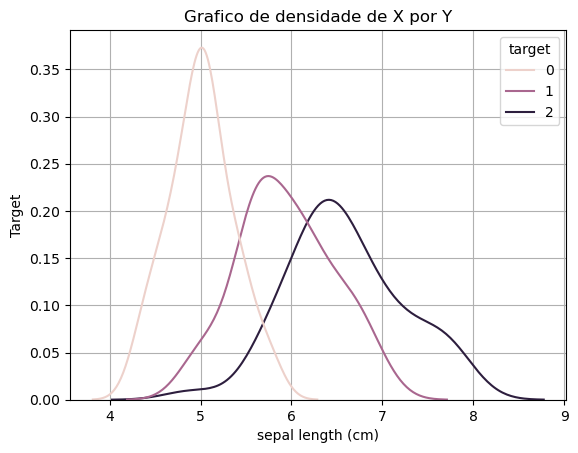

In [46]:
# Visualizacoes

#Avaliar nos graficos potencial de separacao, potencial preditor

sns.kdeplot(data=df , x='sepal length (cm)' , hue='target')
plt.title("Grafico de densidade de X por Y")
plt.xlabel("sepal length (cm)")
plt.ylabel("Target")
plt.grid(True)
plt.show()

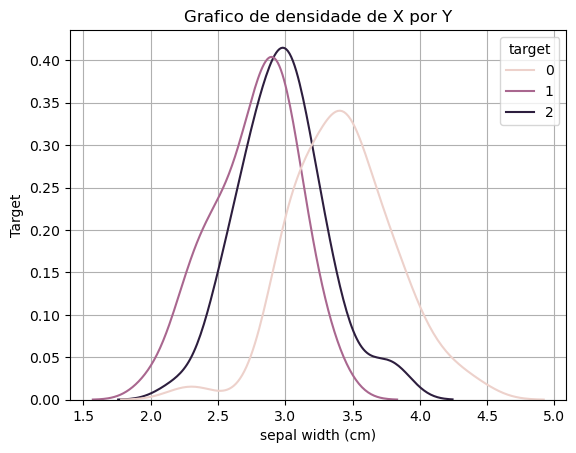

In [38]:
sns.kdeplot(data=df , x='sepal width (cm)' , hue='target')
plt.title("Grafico de densidade de X por Y")
plt.xlabel("sepal width (cm)")
plt.ylabel("Target")
plt.grid(True)
plt.show()

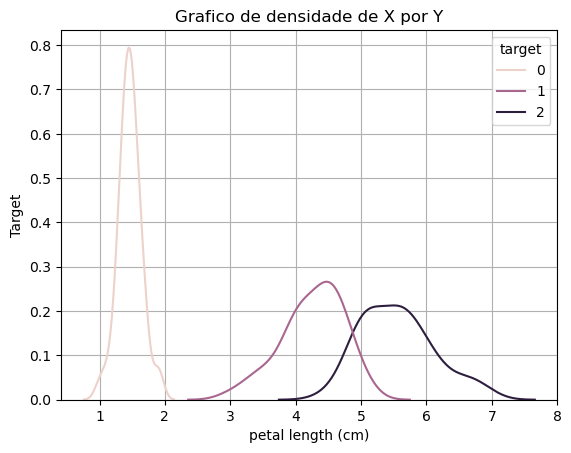

In [40]:
sns.kdeplot(data=df , x='petal length (cm)' , hue='target')
plt.title("Grafico de densidade de X por Y")
plt.xlabel("petal length (cm)")
plt.ylabel("Target")
plt.grid(True)
plt.show()

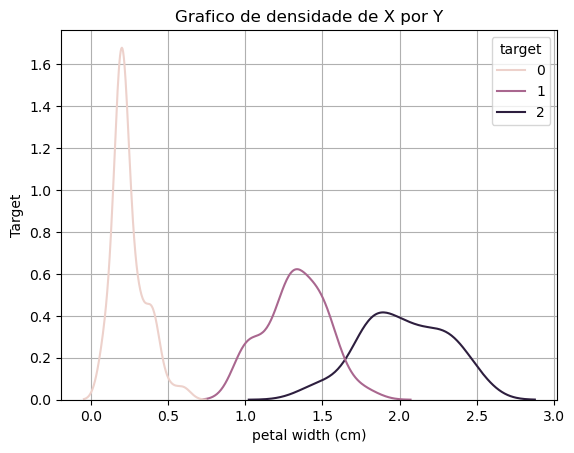

In [42]:
sns.kdeplot(data=df , x='petal width (cm)' , hue='target')
plt.title("Grafico de densidade de X por Y")
plt.xlabel("petal width (cm)")
plt.ylabel("Target")
plt.grid(True)
plt.show()

### Modelagem

In [49]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [51]:
# Feature de entrada/input
X = df[[
    'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'
]]

# Feature target
y = df['target']

In [53]:
# Split conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2)

In [55]:
# Treinamento do modelo
RL = RandomForestClassifier(n_estimators=5, max_depth=14, min_samples_leaf = 4).fit(X_train, y_train)

In [57]:
#Predict

y_pre_train = RL.predict(X_train)
y_pre_test = RL.predict(X_test)

In [61]:
target_names = ['class 0' , 'class 1' , 'class 2']
print(classification_report(y_train, y_pre_train, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        42
     class 1       0.97      0.95      0.96        39
     class 2       0.95      0.97      0.96        39

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [63]:
target_names = ['class 0' , 'class 1' , 'class 2']
print(classification_report(y_test, y_pre_test, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         8
     class 1       1.00      0.82      0.90        11
     class 2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



### Salvar o modelo

In [66]:
joblib.dump(RL, 'Modelo_Treinado.pkl')

['Modelo_Treinado.pkl']